<font face = "Time New Roman" size = 5>It's really tough for me to implement this alogrism. I know the principle of the algorithm, but it is difficult to implement in the process of programming, mainly because my computer can't run, and each run takes several hours, and the cost of debugging is very high. I tried to compress the image and run it again, but the effect is not satisfactory. Debugging took up a lot of my time, and I didn't get a good result in the end, but I put down the idea of ​​programming, I hope the teacher can understand

<font face = "Time New Roman" size = 5>I just tried to use 5 images to implement this alogrism firstly.

<font face = "Time New Roman" size = 6> Initial Part

(108, 192, 50)
(108, 192, 50)


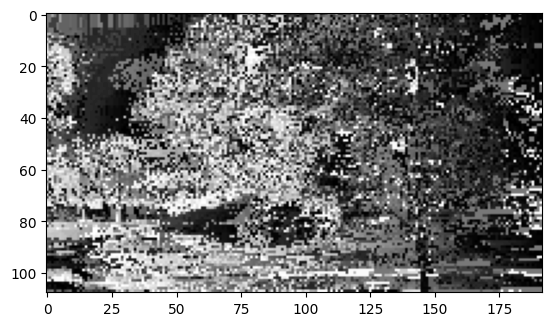

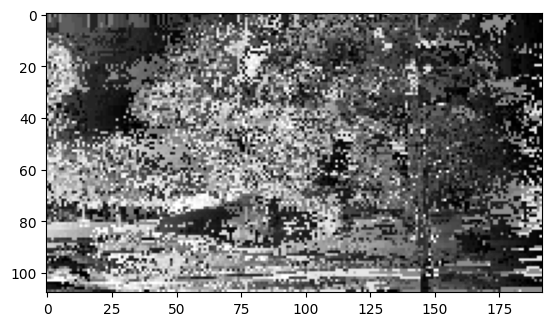

In [60]:
import gco
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
import skimage.io as io
#read txt method one
Camera_prem = np.loadtxt("./cameras.txt")
camera_mat = Camera_prem.T
'''
K1=camera_mat[:,0:3].T
R1=camera_mat[:,3:6].T
t1=camera_mat[:,6]
K2=camera_mat[:,7:10].T
R2=camera_mat[:,10:13].T
t2=camera_mat[:,13]
'''
# load image
img1 = cv2.imread('./test1.jpg')
img2 = cv2.imread('./test2.jpg')
[H, W] = img1.shape[0:2]

# select image order
img_centre = img1
imgL = img2
# imgR: in which objects are on the right in general.
# imgL: in which objects are on the left in general.
sigmac = 10
no_disparity = 50
# set disparity range: disparity = d_min:d_max
disparity = np.linspace(0, 0.0085, no_disparity)#list(range(0,no_disparity, 0.0085))

# set disparity range: disparity = d_min:d_max
D = np.zeros([1, 50])
D[0,:] = np.linspace(0, 0.0085, no_disparity)  #list(range(0,no_disparity, 0.0085))

#N = size(img_seq1,1)
#D = linspace(0,0.0085,50); #good 0-0.085 50
C = no_disparity
L_init = np.zeros([H, W, no_disparity])
unary = np.zeros([H, W, no_disparity])
#unary = ones(C,N)
image_total = 5
neighbor_num = 2
centre_begin = 2
for current_cent in range(centre_begin,image_total-neighbor_num):
    [X, Y] = np.meshgrid(disparity,disparity)
    count = (current_cent-1) * 7
    K1=camera_mat[:,count+0:count+3].T
    R1=camera_mat[:,count+3: count+6].T
    t1=camera_mat[:,count+6]
    #img_centre = cv2.imread('./Road/src/test0001.jpg')
    img_centre = cv2.imread('./test1.jpg')
    for img_id in (current_cent-1, current_cent+1):
        img_neighbor = cv2.imread("./test%01d.jpg"%(img_id))
        count = (img_id-1) * 7
        K2=camera_mat[:,count+0:count+3].T
        R2=camera_mat[:,count+3: count+6].T
        t2=camera_mat[:,count+6]
        for w in range(W):
            for h in range(H):
                n1 = (w-1)*H + h
                node1 = img_centre[h,w,:].reshape([1,3])
                x1 = [w, h, 1]
                front_tmp = np.dot(K2, R2.T)
                front_tmp2 = np.dot(np.dot(front_tmp,  np.dot(np.linalg.inv(K1),R1)), x1)
                front_tmp3 = np.zeros([front_tmp2.shape[0],1])
                front_tmp3[:,0] = front_tmp2
                temp = np.zeros([3,1])
                temp[:,0] =  np.dot(np.dot(K2,R2.T) , (t1-t2))
                temp2 = np.dot(temp, D)
                x2 = front_tmp3 + temp2
                x2_h = np.zeros([3, x2[2,:].shape[0]])
                x2_h[0,:] = x2[2,:].reshape(1, x2[2,:].shape[0])
                x2_h[1,:] = x2[2,:]
                x2_h[2,:] = x2[2,:]

                #x2_h = repmat(x2(3,:),3,1)
                x2 = np.round(np.divide(x2, x2_h))
                x2[0, x2[0,:]<0 ] = 0
                x2[0, x2[0,:]>W-1] = 0
                x2[1, x2[1,:]<0 ] = 0
                x2[1, x2[1,:]>H-1] = 0
                #n2 = (x2[0,:]-1)*H + x2[1,:]
                #n2_ls  = n2(n2<=518400 & n2>=1)
                unary = np.zeros([H, W, no_disparity])
                for i in range(no_disparity):
                    node2s = img_neighbor[int(x2[1,i]), int(x2[0,i]),:]
                    #node2s = img_seq2(n2_ls,:)
                    match_cost = np.sqrt(sum((node1 - node2s)^2,2))
                    #unary[h,w,i] = sum(match_cost)
                    #unary(n2<=518400 & n2>=1,n1) = match_cost
                    unary[h,w,i]=(sigmac/(sigmac+np.sqrt(sum(match_cost**2))))
                L_init=L_init+unary

        for k in range(no_disparity):
            unary[:,:,k] = 1 - L_init[:,:,k]/L_init[:,:,k].max()
        print(unary.shape)
        #unary = 1 - L_init/max(L_init)
        smooth = (1 - np.eye(no_disparity)) * 0.005
        labels = gco.cut_grid_graph_simple(unary/255, smooth, n_iter=-1)
        new_image = np.reshape(labels, [H,W]).astype(int)

        plt.figure(img_id)
        plt.imshow(new_image,cmap='gray')
        cv2.imwrite("./init%01d.jpg"%(img_id), new_image.astype(int))


In [3]:
cv2.imwrite("/Users/shipingguo/Desktop/EE5731_CA2/Part4/init%01d.jpg"%(img_id), new_image.astype(int))

True

<font face = "Time New Roman" size = 5> The results I get are poor, it may be because I compress the image or I use the wrong camera parameters, most likely there is a logic error in my programmes. I have checked many times according to papers, textbooks, course replays. But time is really limited and run time is long, It's really a shame for me that I didn't solve this problem. I have listed my ideas in the next part of BUNDLE OPTIMIZATION.

In [ ]:
#unary = 1 - L_init/max(L_init)
smooth = (1 - np.eye(no_disparity)) * 0.001
labels = gco.cut_grid_graph_simple(unary/255, smooth, n_iter=-1)
new_image = np.reshape(labels, [H,W]).astype(int)


plt.figure(1)
plt.imshow(new_image.astype(int),cmap='gray')

<font face = "Time New Roman" size = 6> Boundle Part

In [ ]:
# load image cv2.imread("test%01d.jpg"%(img_id))
img_centre =  new_image  # cv2.imread('./Road/src/initial0001.jpg')
[H, W] = img_centre.shape[0:2]
sigmac = 10
no_disparity = 50

# set disparity range: disparity = d_min:d_max
disparity = np.linspace(0, 0.0085, no_disparity)#list(range(0,no_disparity, 0.0085))

# set disparity range: disparity = d_min:d_max
D = np.zeros([1, 50])
D[0,:] = np.linspace(0, 0.0085, no_disparity)  #list(range(0,no_disparity, 0.0085))

C = no_disparity
L_init = np.zeros([H, W, no_disparity])
Boundle = np.zeros([H, W, no_disparity])
unary = np.zeros([H, W, no_disparity])
unary2 = np.zeros([H, W, no_disparity])
#unary = ones(C,N)

[X, Y] = np.meshgrid(disparity,disparity)
image_total  = 3
neighbor_num = 2
centre_begin = 1

for img_id in (centre_begin-1, centre_begin+1):  # It's very time consuming, I use 3 images to test
    img_neighbor = cv2.imread("/Users/shipingguo/Desktop/EE5731_CA2/Part4/test%01d.jpg"%(img_id))
    for w in range(W):
        for h in range(H):
            n1 = (w-1)*H + h
            node1 = img_centre[h,w]#.reshape([1,3])
            x1 = [w, h, 1]
            front_tmp = np.dot(K2, R2.T)
            front_tmp2 = np.dot(np.dot(front_tmp,  np.dot(np.linalg.inv(K1),R1)), x1)
            front_tmp3 = np.zeros([front_tmp2.shape[0],1])
            front_tmp3[:,0] = front_tmp2
            temp = np.zeros([3,1])
            temp[:,0] =  np.dot(np.dot(K2,R2.T) , (t1-t2))
            temp2 = np.dot(temp, D)
            x2 = front_tmp3 + temp2
            x2_h = np.zeros([3, x2[2,:].shape[0]])
            x2_h[0,:] = x2[2,:].reshape(1, x2[2,:].shape[0])
            x2_h[1,:] = x2[2,:]
            x2_h[2,:] = x2[2,:]
            #x2_h = repmat(x2(3,:),3,1)
            x2 = np.round(np.divide(x2, x2_h))
            x2[0, x2[0,:]<0 ] = 0
            x2[0, x2[0,:]>W-1] = 0
            x2[1, x2[1,:]<0 ] = 0
            x2[1, x2[1,:]>H-1] = 0
            #n2 = (x2[0,:]-1)*H + x2[1,:]
            #n2_ls  = n2(n2<=518400 & n2>=1)
            for i in range(no_disparity):
                node2s = img_neighbor[int(x2[1,i]), int(x2[0,i]), :]
                #node2s = img_seq2(n2_ls,:)
                
                match_cost = np.sqrt(sum((node1 - node2s)^2,2))
                #unary[h,w,i] = sum(match_cost)
                #unary(n2<=518400 & n2>=1,n1) = match_cost
                unary[h,w,i]=(sigmac/(sigmac+np.sqrt((match_cost**2))))
            L_init=L_init+unary #pc

            # BUNDLE OPTIMIZATION
            labels =cv2.imread("/Users/shipingguo/Desktop/EE5731_CA2/Part4/init%01d.jpg"%(img_id)) # Get the initiall result
            
            #disparity matrix
            disparity_img2 = np.reshape(labels, [H,W]) # reshape(labels, [W, H])'
            disparity_img2 = disparity[disparity_img2 + 1]

            # disparity vector
            disparity_img2 = disparity(labels + 1);
            
            # keep coordinates inside H*W
            img2_project_row = x2[1,:] #max(min(img2_coord(2, :), H), 1);
            img2_project_col = x2[0,:] #max(min(img2_coord(1, :), W), 1);
            
            # turn coordinates into row-wise index
            #img2_coord_idx = sub2ind([W,H], img2_project_col, img2_project_row);
            
            # turn img2_coord into homogeneous
            img2_pro = [x2, np.ones(1, H*W)]

            img1_pro = K1 * R1.T * R2 / K2 * img2_pro +  K1 * R1.T * (t2 - t1).T * disparity_img2[x2]

            img1_project = img1_pro / img1_pro[3, :]
            img1_project = round(img1_project[1:2, :])
            % squared euclidean distance
            dist = sum((node1 - img1_project)**2)
            sigma_d = 2.5
            Boundle[i,:] = np.exp(-dist / (2*sigma_d^2))
            unary = unary + L_init*Boundle
for k in range(no_disparity):
    unary[:,:,k] = 1 - L_init[:,:,k]/L_init[:,:,k].max()
print(unary.shape)



In [ ]:
#unary = 1 - L_init/max(L_init)
#unary = 1 - L_init/max(L_init)
import skimage.io as io
smooth = (1 - np.eye(no_disparity)) * 0.0001
labels = gco.cut_grid_graph_simple(unary/255, smooth, n_iter=-1)
new_image = np.reshape(labels, [H,W]).astype(int)

#plt.figure(1)
io.imshow(new_image.astype(int))